Hocam merhaba, ben ödevi 3 martta bitirdim esasında, deadline'ın bugün olduğunu düşündüğüm için submit etmedim. Ama yanlış düşünmüşüm.FYI.

Aşağıda sonuçları görebilirsiniz.

.Model originally consist-ed- of 3 parts.
 - Full Version
 - Logless version
 - Log Version

However, I decided to go simple,and full version has been modeled.  
    
First of all I excluded 2 columns which have string values (COUNTRY, CNAME), and the YEAR column.
    - Exluding, I checked these features in terms of clustering or OLS.
    - it was an option to transform these columns to multiple numeric categories but in LR numeric columns should have a scale.
    - So encoding was another option but there are too many countries. Best option was to exclude them.
    - YEAR column was already encoded.

I tried several things in future selection part like; Forward selection, Lasso, recursive feature elimination, Evaluationg VIF etc. 
However, backward selection provided the best solution.

Also, I tried standard_scaler, it couldnt boost the performance.
I used kmeans to identify an outlier, I used it to exclude outliers.However, I realized that I could already detect on single factor analysis graphs.

I tried CNAME, OECD, TROPICS, CNAME and DALE as a cluster base for KMEANS. None of them decreased our MSE.
Eventually, my final model's values are;

1st Phase:

 - Number of Features: 30
 - Mean Squared Error: 9.469461706029524
 - Adj. R-squared:  0.866

2nd Phase:
After visualization, outlier detection and different clustering and feature selection trials
 - Number of Features: 30
 - Mean Squared Error: 8.866708669832526
 - Adj. R-squared: 0.946

Last and 3rd Phase:
After backward feature selection(checked every possible subset)

 - Number of Features: 14
 - Mean Squared Error:  8.016101113503211
 - Adj. R-squared:  0.999

I checked every possible subset option of 19 best features in terms of R-2 value , so this is the most efficient MSE score in my subset of features.


Also in last part, it is possible to observe dispersion of residual values and target variable. 

However, I am sure that there is huge multicollinearity in data, as you can observe from confusion matrix. 
But that was not the KPI metric of this hw. May be next time I would consider it. :)

In [1]:
from IPython.display import HTML, display

import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import pandas as pd
df = pd.read_csv('WHOData.csv', encoding='latin-1')
df.drop(['COUNTRY', 'CNAME','YEAR'], axis = 1, inplace = True)
target = df['COMP'] 
df.drop(['LCOMP', 'COMP'],axis = 1,inplace = True) 

np.random.seed(123)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df, target, test_size = 0.25, random_state=42)

In [2]:
#BASIC OLS WITH USING ALL FEATURES
lm = sm.OLS(train_y,train_x).fit()
print(lm.summary())

y_pred4 = lm.predict(test_x)
print(metrics.mean_squared_error(test_y, y_pred4))

                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     151.9
Date:                Fri, 13 Mar 2020   Prob (F-statistic):          2.40e-248
Time:                        19:28:37   Log-Likelihood:                -1827.4
No. Observations:                 630   AIC:                             3711.
Df Residuals:                     602   BIC:                             3835.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
HEXP                    0.0040    

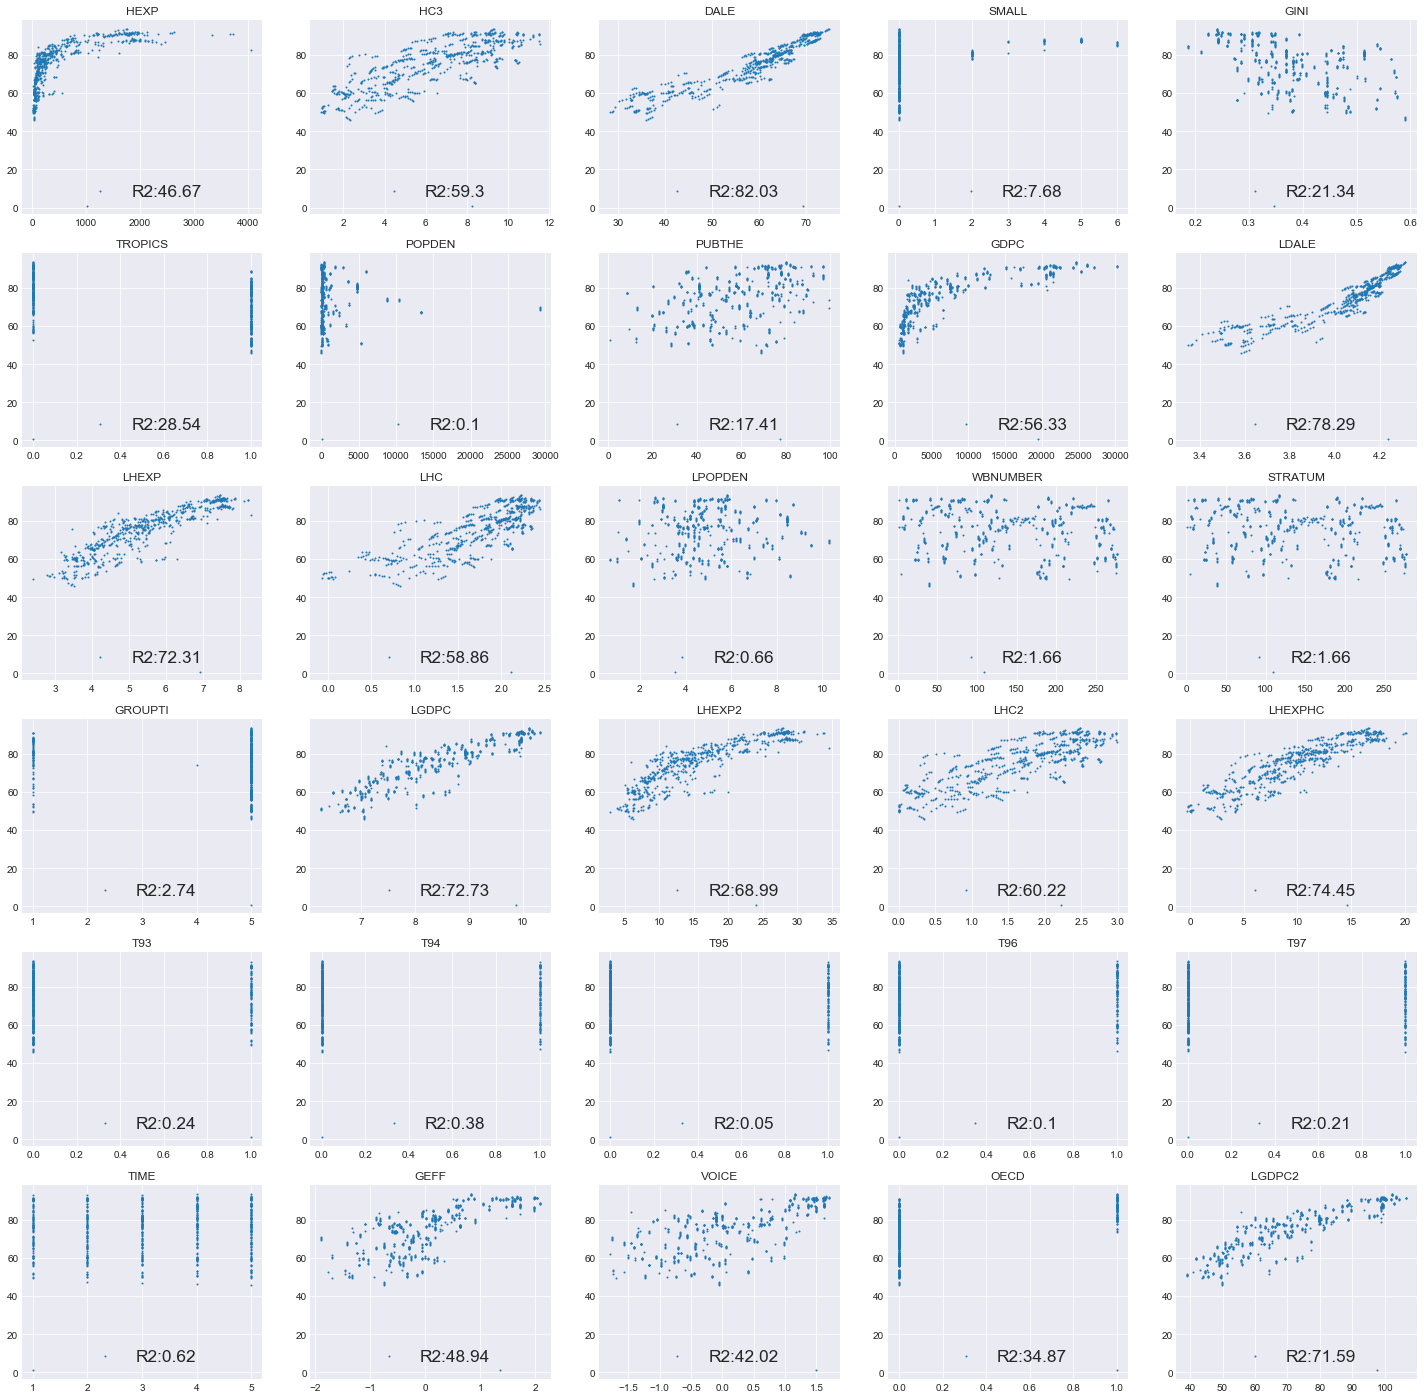

In [3]:
#SFA OF EVERY FEATURE
plt.subplots(6,5,figsize=(25,25))
for i in range(0,len(train_x.columns)):
    #test our OLS model
    test_a = sm.add_constant(train_x.iloc[:,i]) 
    reg1 = sm.OLS(endog=train_y, exog=test_a, missing='none')
    results = reg1.fit().rsquared
    #Graphs
    plt.subplot(6,5,1+i).set_title(train_x.columns[i])
    plt.scatter(train_x.iloc[:,i], train_y, s=1)
    #legend = plt.legend(loc='lower center', shadow=True, fontsize='x-large')
    #legend.set_label('aaa')
    # Put a nicer background color on the legend.
    #legend.get_frame().set_facecolor('C0')
    plt.legend(['R2:' + str(round(results*100,2))], loc = 8,fontsize = 'xx-large', numpoints = 4)

I can point out 1 outliers in my data, which İS so close to 0 in terms of output variable.
I need to remove it to achieve a better MSE.

#### Dispersion of residuals

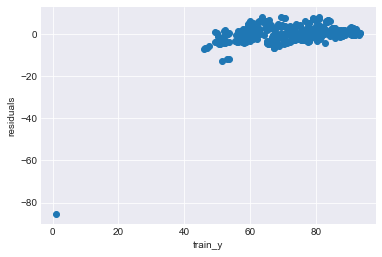

In [19]:
x = train_y
y = lm.resid

plt.scatter(x, y)
plt.xlabel("train_y")
plt.ylabel("residuals")
plt.show()

In [21]:
#REMOVE OUTLIERS
train_x['COMP'] = train_y
train_x.drop([train_x[train_x['COMP'] <5].index[0]], inplace = True)
train_y = train_x['COMP']
train_x.drop(['COMP'], axis = 1,inplace = True)


#TRAIN MODEL
train_a = train_x
train_a = sm.add_constant(train_a) 
reg1 = sm.OLS(endog=train_y, exog=train_a, missing='none')
results = reg1.fit()
results


test_b = test_x
#Fit test data
test_b = sm.add_constant(test_b) 
y_pred = results.predict(test_b)
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  


#BASIC OLS WITH USING ALL FEATURES
lm = sm.OLS(train_y,train_x).fit()
print(lm.summary())

y_pred4 = lm.predict(test_x)
print(metrics.mean_squared_error(test_y, y_pred4))

Mean Squared Error: 8.866708669736294
                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     406.4
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:34:35   Log-Likelihood:                -1522.7
No. Observations:                 629   AIC:                             3101.
Df Residuals:                     601   BIC:                             3226.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

D:\Users\akavdir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Users\akavdir\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Dispersion of residuals

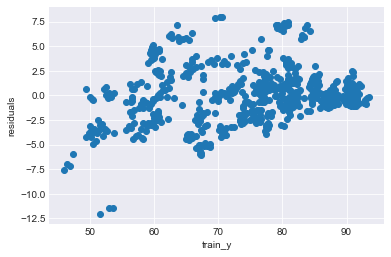

In [22]:
x = train_y
y = lm.resid

plt.scatter(x, y)
plt.xlabel("train_y")
plt.ylabel("residuals")
plt.show()

#### Backward future selection trial

In [42]:
#Backward Elimination
#p-values are significant but the effect of the features are poor.So this is not a effective way to do it 

cols = list(train_x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = train_x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(train_y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.0001):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['HC3', 'DALE', 'SMALL', 'GINI', 'VOICE', 'LGDPC2             ']


### Creates Subset and tries every possible combination

In [29]:
#This code used for selecting right feature set
"""
#According to graphs, I dropped insignificant features and after that trying possible subsets were not that hard.
dropem = ['POPDEN','LPOPDEN','T93', 'T94', 'T95', 'T96', 'T97','TIME','WBNUMBER', 'GROUPTI', 'STRATUM']

train_x.drop(dropem, axis = 1, inplace = True)
test_x.drop(dropem, axis = 1, inplace = True)

import itertools 
from tqdm import tqdm
  
def findsubsets(s, n): 
    return list(itertools.combinations(s, n)) 
  
# Driver Code 
s = list(train_x.columns)
n = 14
  
comb_lists = findsubsets(s, n)


list_mse = []
for a in tqdm(range(0,1)):
    for i in comb_lists:

        #TRAIN MODEL

        train_a = train_x[list(i)]
        train_a = sm.add_constant(train_a) 
        reg1 = sm.OLS(endog=train_y, exog=train_a, missing='none')
        results = reg1.fit()

        test_b = test_x[list(i)]
        #Fit test data
        test_b = sm.add_constant(test_b) 
        y_pred = results.predict(test_b)
        #print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  

        list_mse.append(metrics.mean_squared_error(test_y, y_pred))
"""


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [03:01<00:00, 181.16s/it]


In [43]:
#Find related optimum subset in terms of MSE
#optimum_subset = list(comb_lists[list_mse.index(min(list_mse))])

optimum_subset =  ['HEXP',
                     'HC3',
                     'DALE',
                     'SMALL',
                     'GINI',
                     'PUBTHE',
                     'GDPC',
                     'LHEXP',
                     'LGDPC',
                     'LHEXP2',
                     'GEFF',
                     'VOICE',
                     'OECD',
                     'LGDPC2             ']

#TRAIN MODEL
train_a = train_x[optimum_subset]
train_a = sm.add_constant(train_a) 
reg1 = sm.OLS(endog=train_y, exog=train_a, missing='none')
results = reg1.fit()

test_b = test_x[optimum_subset]
#Fit test data
test_b = sm.add_constant(test_b) 
y_pred = results.predict(test_b)
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred)) 

train_x = train_x[optimum_subset]
test_x = test_x[optimum_subset]

#BASIC OLS WITH USING OPTIMUM SUBSET FEATURES
lm = sm.OLS(train_y,train_x).fit()
print(lm.summary())

y_pred4 = lm.predict(test_x)



Mean Squared Error: 8.016101113503211
                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.991e+04
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:43:09   Log-Likelihood:                -1565.0
No. Observations:                 629   AIC:                             3158.
Df Residuals:                     615   BIC:                             3220.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

#### Dispersion of residuals

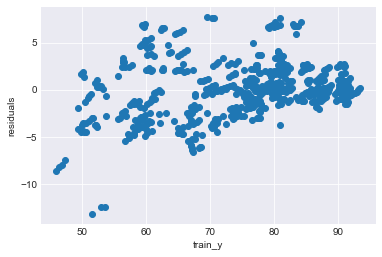

In [44]:
x = train_y
y = lm.resid

plt.scatter(x, y)
plt.xlabel("train_y")
plt.ylabel("residuals")
plt.show()

# Final Multicollinearity check with confusion matrix

In [45]:
def correlation_matrix_constructor(df, target_column):
    '''
    Creates a correlation matrix.
    '''
    corrmat = df.corr()
    plt.figure(figsize=(20,10))
    k = 15 #number of variables for heatmap
    cols = corrmat.nlargest(k, target_column)[target_column].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

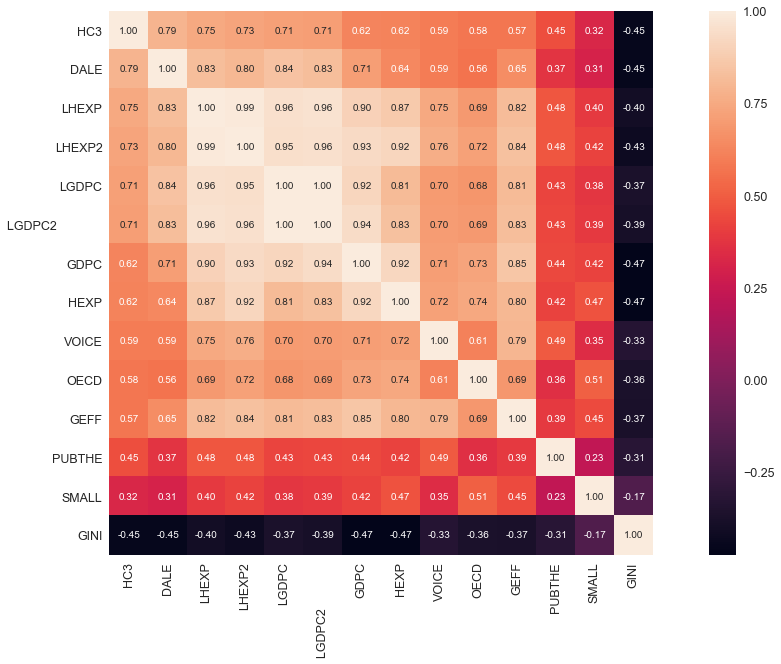

In [46]:
correlation_matrix_constructor(train_x, 'HC3')